# IBM Qiskit Hands-On Workshop

### Hello!
### Welcome to **IBM Qiskit Hands-on Workshop**

This session today is divided into two parts: one is coding part and another one is a bit of discussion part. A breif overview of this notebook is as follows:
1. PART I: **How to Run Quantum Circuits**:<br>
    In this section we will construct some circuits and using those circuits we will explore
    different kinds of backends to run those circuits on.
2. PART II: **Introduction to Qiskit Patterns**:<br>
    In this section you will be introduced to *Qiskit Patterns* and you will be shown a n example on how an
    actual problem is actually solved using Qiskit Pattern and how each of it's steps are performed for
    effective use of current quantum processors.

# PART I: How to Run Quantum Circuits

Let's start from a question: **You designed your Quantum Circuit. Now you want to run it and extract the results from it. *How would you run that circuit?***

There are two main methods for executing a quantum circuit and obtaining results:<br>

1. **Simulating Locally**: This involves running the quantum circuit on a simulator backend, which uses classical computing to mimic the behavior of a quantum computer. The simulator performs complex mathematical operations to emulate quantum mechanics, allowing you to test and experiment with quantum circuits without needing actual quantum hardware. These simulations can be executed directly on your local classical computer, without requiring access to a physical quantum processor.

2. **Running on a Quantum Processor**: Alternatively, you can execute your circuit on a real quantum processor. Through the IBM Quantum Platform, you can access quantum processors via the cloud, eliminating the need for physical access. This allows you to run your circuits on an actual quantum chip in real-time and retrieve the results.

First let's install all required packages:

In [1]:
### INSTALL QISKIT inside your cloud-based environment

%pip install qiskit[visualization]
%pip install qiskit_aer
%pip install qiskit_ibm_runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 7.4 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=b217d1f874e535de9bdd694c4f6029f05c20473602327477ba9ede69de753160
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 81.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### Simulation using `quantum_info` Module

Using Qiskit `quantum_info` module to simulate quantum properties of the circuit. It is used to simulate quantum behaviour of the circuit. It can show the statvector of the output of the circuit after applying all the gates. It can also show probabilities of finding qubits

In [1]:
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi

Let's first create a simple circuit without any measurement and look at some of it's properties using Qiskit.

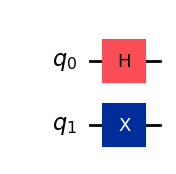

In [2]:
qc = QuantumCircuit(2) #Initialize a Quantum Circuit with 2 Qubits
qc.h(0) #apply hadamard gate to the first qubit
qc.x(1) #apply hadamard gate to the first qubit

qc.draw('mpl')  #let's draw the circuit

Now these qubits are in a superposition state. To look at the state vector after the gates operations have been performed on both qubits, we will use `Statevector` function.

In [3]:
psi = qi.Statevector(qc)
psi.draw('latex')

<IPython.core.display.Latex object>

To view the probabilities of each state, use `probabilities` function.

In [ ]:
prob = psi.probabilities()
prob

The probablity to get each state is 1/4th. But we won't get this number if we run our circuit just one time. To get a real probability of a state. Run the circuit, say a 10000 times, then it will starts to become slowly evident that the probablility of measuring each state in our circuit is indeed 1/4.

Now to measure the circuit we have to actually run it multiple times to get a distribution that can corresponds to the probabilities of finding a certain state.

In [ ]:
counts = psi.sample_counts(shots = 1000) #shots corresponds to how many time you want to run the circuit
print(counts)

This result shows that if we run this circuit 1000 times, we will get each state a certain amount of time, as shown in the output of the previous cell. To plot these results, we'll use qiskit `visualization` module.

In [ ]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)

As mentioned earlier, an interesting thing to do here is to increase the amounts of shots and see that the count of each state starts to approach 1/4th of the your number of shots.

To know what state the system measured at each shot. Use `sample_memory` function.

In [ ]:
samples = psi.sample_memory(shots=10)
print(samples)

We can also get bloch sphere representation of each qubit after gates have been applied.

In [ ]:
psi.draw('bloch')

There are many uses of this `quantum_info` module, we can use it to find expectation value of the state vector corresponding to any operator that you define. You can play around a little bit with different gates, different number of qubits and explore more functions in *Qiskit Documentation*.

#### Drawbacks of `quantum_info` module:
There is limitations of cases in which you can use `quantum_info`. One major limitation is that if you measure your qubit in your circuit then it will give an error. For exaple, let's write a code for a circuit with classical register or mid circuit measurement.

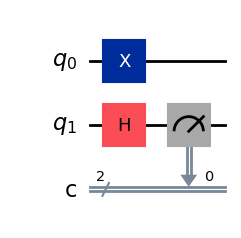

In [4]:
qc1 = QuantumCircuit(2,2)
#The second 2 represent the number of classical bits to store the results of measurements on the qubits.

qc1.h(1)
qc1.x(0)
qc1.measure(1,0)
#Here, (1,0) means that measurement result of qubit 1 to classical bit 0.

qc1.draw('mpl')


Now if we run this circuit through `Statevector`, then it will give error.

In [ ]:
qi.Statevector(qc1)

This error is due to the act of measurement. After performing measurement, there is not state vector to show because the wave function collapses after measurement. The superposition is destroyed.

### Simulation using `Basic Simulator` Module

The `Basic Simulator` is python implementation of a basic (Non-efficient) quantum simulator. <br>

Let's construct a circuit:

In [ ]:
qc2 = QuantumCircuit(2,2)
qc2.h(0)
qc2.measure(0,0)
qc2.x(0)
qc2.h(1)
qc2.draw('mpl')


Now we will run this circuit on `Basic Simulator`:

In [ ]:
from qiskit.providers.basic_provider import BasicSimulator

simulator_basic = BasicSimulator() #Initialize the basic simulator
job = simulator_basic.run(qc2, shots = 1024) #Run the Quantum Circuit
result = job.result() #Retrieve the result
print(result) #Print the result

To visualize it, first we will get counts of the measurements and then plot histogram.

In [ ]:
counts = result.get_counts()
print(counts)

In [ ]:
#Write the code to visualize histogram
#Write your code here:


To get each result from each shot:

In [ ]:
job = simulator_basic.run(qc2, shots = 10, memory = True)
result = job.result()
samples = result.get_memory()
print(samples)


There is a limitation to what types of gates a simulator can mimic. There are very complicated gates that `Basic Simulator` cannot run, and hence will give an error.<br>
The reason for this is that Simulator can only run specific gates. The specific gates a backend can run are called **Basis Gates** of that backend.

https://docs.quantum.ibm.com/guides/native-gates#tables-of-gates-and-operations-by-processor-family

To demonstrate this, let's build a 5 qubit *Quantum Fourier Transform Ciruit* (QFT) using qiskit circuit library, which have many pre build circuits.

In [ ]:
from qiskit.circuit.library import QFT
from qiskit import qasm

qc3 = QuantumCircuit(5,5)
qc3.append(QFT(5), range(5))
qc3.measure(range(5),range(5))
qc3.draw('mpl')


Here, we have imported a 5 qubit QFT circuit. Now we will run this circuit with `BasicSimulator` and we shall see that it will give an error.

In [ ]:
job = simulator_basic.run(qc3, shots = 1024)

This error in above cell, shows that `BasicSimulator` doesn't recognize QFT circuit. It doesn't recognize it's gates. <br>
So what should we do now? <br>
Now to avoid this error, we have to use qiskit `transpile service`. This breakdown the circuit into the basis gates of that specific backend that it can actually run or simulate.


In [ ]:
from qiskit import transpile
qc_t = transpile(qc3, backend = simulator_basic)
qc_t.draw('mpl')

Now to compare what `Transpilation` do to a circuit can be seen in comparation between *the actual 5 Qubit QFT circuit* and *Transpiled QFT circuit* . Below is an image of an actual 5 qubit QFT circuit. The changes of gates are evident.

![Image description](https://github.com/SyedAliAsghar2001/IBM-course-Exploratory-Data-Analysis-for-Machine-learning-/blob/main/Screenshot%202025-01-12%20172513.png?raw=true)


This is not all that `transpiler` do in qiskit transpilation service. When using an actual quantum processor there are many changes that should be made to run the circuit on that specific backend.

#### EXERCISE:
Run this transpiled circuit on `Basic Simulator` for 1024 shots. <br>
Retrieve it's results. <br>
Plot histogram of the counts.

In [ ]:
# Write your code here
job =
result =
counts =
#Now plot histogram:


<details>

<summary>Answer</summary>


```python
job = simulator_basic.run(qc_t, shots = 1024)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)
```
</details>

#### Drawbacks of `Basic Simulator` module:
Don't use this simulator if:
1. Circuit is large (many qubits, many gates)
2. Need to find coherent states (State Vector / Density Matrix)
3. Need to add noise.

### Simulation using `AerSimulator` module

In [ ]:
from qiskit import QuantumCircuit , transpile
from qiskit.quantum_info import Statevector
from qiskit.providers.basic_provider import BasicSimulator


In [ ]:
qc4 = QuantumCircuit(2,1)
qc4.h(1)           #Apply hadamard gate to qubit 1
qc4.measure(1,0)   #measure that qubit. 50% of time it will be 0 and 50% of the time it will be 1.
qc4.h(0).c_if(0,1) #if the measurement is 0 then hadamard won't be activated, but if measurement is 1, then hadamard will be activated.
qc4.draw('mpl')

Half of the time it will be
 $$ | 0\rangle \otimes | 0\rangle $$

and half of the time it will be
 $$ |1\rangle \otimes  \frac{1}{\sqrt{2}} \left( | 0\rangle \otimes | 1\rangle \right) $$

As there is half half probablility of qubit 0 being measured 1 and 0. So there is equal probablity of having both states.<br>
Now how to simulate this type of circuit where not interested in the counts in the classical register but the output of the circuit. <br>
If we try to run this circuit on `quantum_info` module to get state vector, then we will get an error.

In [ ]:
psi = Statevector(qc4)

If we use `Basic Simulator` it won't give us the projected state at the output but the only measurement at the classical register.

In [ ]:
simulator_basic = BasicSimulator()
qc_basic = transpile(qc4, backend = simulator_basic)
result = simulator_basic.run(qc_basic, shots = 1024).result()
counts = result.get_counts()
print(counts)

Here `Aer Simulator` comes in and help us. First let's import Aer simulator module and initiate the simulator.

In [ ]:
from qiskit_aer import AerSimulator
simulator_aer = AerSimulator()

`AerSimulator` provides us a unqiue function i.e. `save_statevector` function. It saves the statevector at that point where we introduce the function. and conclusively, we can extract the state vector even after performing a measurement or at any point in a circuit.

In [ ]:
qc5 = QuantumCircuit(2,1)
qc5.h(1)           #Apply hadamard gate to qubit 1
qc5.measure(1,0)   #measure that qubit. 50% of time it will be 0 and 50% of the time it will be 1.
qc5.h(0).c_if(0,1) #if the measurement is 0 then hadamard won't be activated, but if measurement is 1, then hadamard will be activated.

qc5.save_statevector()
qc5.draw('mpl')

Now run the above circuit using `Aer Simulator`

In [ ]:
qc_aer = transpile(qc4, backend = simulator_aer)
result = simulator_aer.run(qc5).result()
psi = result.get_statevector()
psi.draw('latex')

What this `AerSimulator` is doing is that it is giving us the state vector at the output of the circuit. As both states have equal probablity, you can see that if you run the above cell various times. <br>
*Go on try it. Run above cell multiple time and see the change in output*

##### `Aer Simulator` is efficient

To demonstrate how time efficient `AerSimulator` is as compared to other simulators that we used before, let's take a look at this circuit. It is a GHZ state generator.

In [ ]:
n = 500 #No. of qubits
qc6 = QuantumCircuit(n)
qc6.h(n-1)

for i in range(n-1, 0, -1):
    qc6.cx(i, i-1)

qc6.measure_all() #Measure all qubits

#qc6.draw('mpl')

#### EXERCISE:
Now to compare the time efficiency of Aer simulator, run this circuit first using `Basic Simulator`:

In [ ]:
%%time
# keep the shots to 1024

result =  # write your code here
counts = # write your code here
print(counts)

<details>

<summary>Answer</summary>


```python
result = simulator_basic.run(qc6, shots = 1024).result()
counts = result.get_counts()

```
</details>

Now run that same circuit on `Aer Simulator` as well.

In [ ]:
%%time

# keep the shots to 1024

result = # write your code here
counts = # write your code here
print(counts)

<details>

<summary>Answer</summary>


```python
result = simulator_aer.run(qc6, shots = 1024).result()
counts = result.get_counts()

```
</details>

Once you have run the above circuit with only **5** qubits on both simulators, you'll notice that there is not much time difference between those two.<br>
Now, go to the original circuit and increase the number of qubit (but do comment out qc6.draw('mpl') command) as follows:<br>
Do it for 24 qubits, 50 qubits then go for 500 qubits. <br>
To see actual efficiency of `AerSimulator` method `matrix_product_state`. Run the circuit through all three backends:
1. `Basic Simulator`
2. `Aer Simulator`
3. `Aer Simulator` with `statevector` method then with `matrix_product_state` method. (Given below)

`Aer Simulation` Matrix_product_state method for 500 qubits:

In [ ]:
%%time

# keep the shots to 1024

result = simulator_aer.run(qc6, shots = 1024, method = 'statevector').result() #Change the method to Matrix_product_method
counts = result.get_counts()
print(counts)

Specialty of `matrix_product_state` is that Instead of storing the entire statevector (which requires 2^n complex numbers for
n-qubit systems), MPS represents the quantum state as a chain of tensors connected by bonds. This is the reason it can process 50 qubits so easily.

#### Simulating Noise with `Qiskit Aer Simulator`

#### EXERCISE
Create a circuit with 2 qubits. Apply hadamard gate on qubit 0 and `cx` gate at qubit 0 and 1. And then measure it. Then draw it.<br>
Then run the simulation on `qiskit Aer`, which will be with no noise.<br>
After running the circuit now plot a histogram for the counts. In the next cell.

In [ ]:
#Write your code here:


<details>

<summary>Answer</summary>


```python
qc7 = QuantumCircuit(2,2)
qc7.h(0)
qc7.cx(0,1)
qc7.measure([0,1], [1,0]) #first bracket gives which qubits to measure and second bracket provides on which classical bit to map that wubit respectively.
qc7.draw('mpl')

qc_aer = transpile(qc7, backend = simulator_aer)
result_ideal = simulator_aer.run(qc_aer, shots = 1024).result()
counts_ideal = result_ideal.get_counts()
```
</details>

Here you can see that with no noise only entangled states are measured with half half probablities. But this is the ideal case with no noise where no other state is measured.

In [ ]:
from qiskit_aer import noise
prob = 0.1
error = noise.depolarizing_error(prob, 2)

noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(error, ['cx'])
basis_gates = noise_model.basis_gates

result_noisy = simulator_aer.run(qc7,
                                shots = 1024,
                                noise_model = noise_model,
                                basis_gates = basis_gates).result()
counts_noisy = result_noisy.get_counts()

Now compare the result of circuit with no noise and the circuit with noise.

In [ ]:
from qiskit.visualization import plot_distribution
plot_distribution([counts_ideal, counts_noisy])

In the above plot it is evident that with noisy circuit, there are chances to get the states which are not possible to get with noise free circuit. This feature of `Qiskit Aer` comes in handy when we scale up our circuits and number of qubits.


### Using `Qiskit_IBM_Runtime` to run circuit on `QPU`

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
## Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(

    channel="ibm_quantum",

    token="eed164d4b2637d86d4f02090633c55259fc09ed8abab662f73748140e329e069b306852572fd719c2b34dce7a2e75cdb863247813ed03f500360bcf99af84916",

    set_as_default=True,

    # Use `overwrite=True` if you're updating your token.
    overwrite=True,
)

In [ ]:
from math import pi
from qiskit import QuantumCircuit , QuantumRegister , ClassicalRegister , transpile
from qiskit.visualization import plot_distribution
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import SamplerV2, EstimatorV2 , QiskitRuntimeService

#### Define Sampler Instances

In [ ]:
backend_aer = AerSimulator()

In [ ]:
## To run on hardware, select the backend with the fewest number of jobs in the queue

service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=127)
backend.name

In [ ]:
sampler_aer = SamplerV2(backend = backend_aer)
sampler_back = SamplerV2(backend = backend)

#### Create Circuits

In [ ]:
qc0 = QuantumCircuit(1)
qc0.h(0)
qc0.measure_all()
qc0.draw('mpl')

#### Transpile the circuit

First for `Aer Simulator`:

In [ ]:
qc0_aer = transpile(qc0, backend = backend_aer)
qc0_aer.draw('mpl')

Now transpile for `ibm_backend`:

In [ ]:
qc0_back = transpile(qc0, backend = backend)
qc0_back.draw('mpl')

#### Execute using Sampler

In [ ]:
job_aer = sampler_aer.run([qc0_aer], shots = 100)
job_back =sampler_sher.run([qc0_sher], shots = 2)

In [ ]:
result_aer = job_aer.result()
result_back = job_back.result()

In [ ]:
counts_qc0_aer = result_aer[0].data.meas.get_counts()

In [ ]:
counts_qc0_back =result_back[0].data.meas.get_counts()

# PART II: Introduction to Qiskit Patterns
A Qiskit pattern is a general framework for breaking down domain-specific problems and contextualizing required capabilities in stages. This allows for the seamless composability of new capabilities developed by IBM Quantum™ researchers (and others) and enables a future in which quantum computing tasks are performed by powerful heterogenous (CPU/GPU/QPU) computing infrastructure. Blocks or groups of blocks perform the steps of a pattern, with the Qiskit SDK providing an important foundational layer, supported by other tools or services developed by IBM Quantum or the quantum open-source community. Qiskit patterns allow domain experts to specify a problem and compose the tooling (blocks) that achieves a Qiskit pattern. That pattern can then be executed locally, through cloud services, or deployed with Qiskit Serverless.

![Qiskit Sample](https://www.ibm.com/quantum/_next/image?url=https%3A%2F%2Fresearch-website-prod-cms-uploads.s3.us.cloud-object-storage.appdomain.cloud%2FQiskit_Cloud_Blog_Image_191524194f.png&w=1584&q=75 'Qiskit')

The four steps of a Qiskit Pattern are as follows:

1. **Map** the problem to quantum circuits and operators.
2. **Optimize** for target hardware.
3. **Execute** on target hardware.
4. **Post-process** results.


The `Qiskit SDK`, the `Qiskit Runtime Service`, and the `Qiskit Transpiler Service` are three distinct components, each serving a specific purpose within `Qiskit patterns` for different tasks.. Below is a diagram which shows the four steps involved in running a quantum circuit on real hardware (map, optimize, execute, and post-process). At each step, you can see a color-coded description of where each aspect of Qiskit plays a role.


[![A map of the broader Qiskit ecosystem](https://docs.quantum.ibm.com/images/qiskit-patterns/patterns.svg 'Qiskit Overview')](https://docs.quantum.ibm.com/guides)


## Map the problem to quantum circuits and operators:

This step describes how a user starts with a classical problem and figures out how to map it to a quantum computer. For example, there is a hamiltonian quantum chemistry that you are trying to solve or you want to find the ground energy level of that hamiltonian. This step generally involves constructing a quantum circuit representing the hamiltonian ou are attempting to solve.
However, in many problems there might not be a straight forward hamiltonian involved. In that case you have to first come up with a function or hamiltonian which corresponds to the problem. and then map that function onto the quantum circuit. <br>

While mapping is still an area of open research, there are some guidelines:
1. **Pick a problem** that is computationally difficult.
2.  **Translate the outcomes** you wish to measure into either an expection value or cost function.
3.  **Map to a lattice** that takes advantage of the hardware topology.

The problem should be mapped to a quantum circuit according to the algorithm you are using to solve the problem. <br>
For example, if you are using **Variational Quantum Eigensolver (VQE)** or **Quantum Approximate Optimization Algorithm (QAOA)**, these are the algorithms where a cost function is minimized or maximized, then you probably have to construct a circuit with parameterized gates so that you can minimize or maximize the cost function or the hamiltonian that you are solving.

## Optimize for target hardware:
Make sure the quantum circuit is adjusted and optimized for the specific quantum computer or simulator you are using. This could involve simplifying the circuit or making it run more efficiently on the hardware's architecture.
The overall goal of the optimization step is to map all of the virtual qubits of our circuits on the real qubits somewhere on the topology of the actual quantum chip.
The name of the game is to reduce errors as much as possible.  <br>
Optimization involves two steps in general:
1. **Plan Layout**: Need to go from virtual qubits to real qubits.
2. **Fix Routing**: Avoid long-range interactions when possible (more SWAPS = bad).
3. **Merge gates**: Get rid of unnecessary gates or combinations.

## Execute on target hardware:
Run the optimized quantum circuit on the actual quantum machine or simulator. The goal here is to get results from the quantum computer.

## Post process the results:
Once the quantum computer has finished running the circuit, you analyze the results. This might involve converting raw data into a meaningful format or drawing conclusions from the output.

### Additional Information
**Notebook prepared by**: Syed Ali Asghar